# Applying Gaussian filters to the STFT of a sound signal

In [1]:
import Pkg
Pkg.activate("..")
import WCA1
using WCA1

 Activating environment at `/mnt/data/L2S/myWCA1/Project.toml`


## Synthetic Linear Chirp

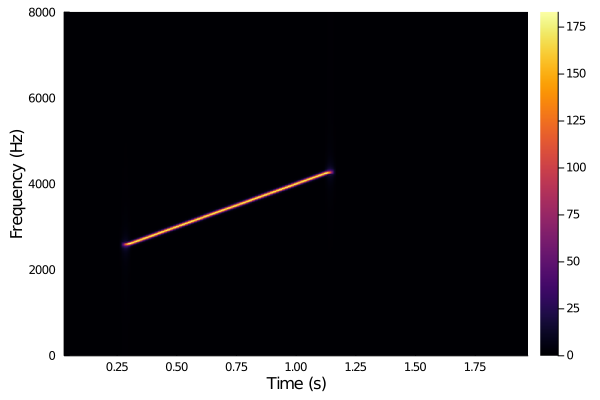

In [2]:
include("../tests/signals.jl")

fs = 16000 #Hz
duration = 2 #seconds
x = linear_chirp(fs, duration)
X = stft(x, 1000, 900; fs=fs, window=WCA1.hanning)

plot_heatmap(abs.(X.stft); time=X.time, freq=X.freq)

In [3]:
include("../tests/utils.jl")
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

In [4]:
using ImageFiltering

function stft_filter(S::Matrix{T}, kernel=Kernel.gaussian(3)) where {T<:Complex}
    return imfilter(real(S), kernel) + im * imfilter(imag(S), kernel)
end

stft_filter(S::STFT, kernel=Kernel.gaussian(3)) = stft_filter(S.stft, kernel)

stft_filter (generic function with 4 methods)

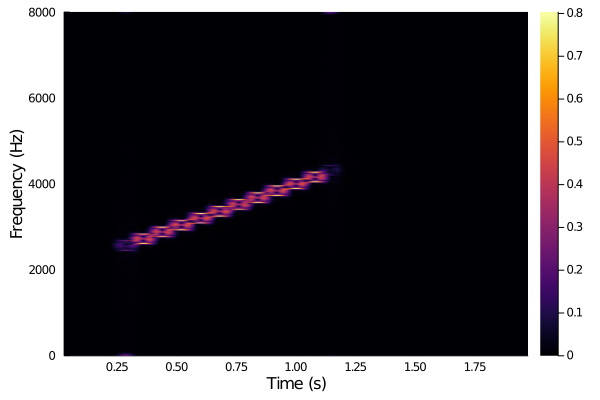

In [5]:
Y = stft_filter(X, Kernel.gaussian(3))
plot_heatmap(abs.(Y); time=X.time, freq=X.freq)

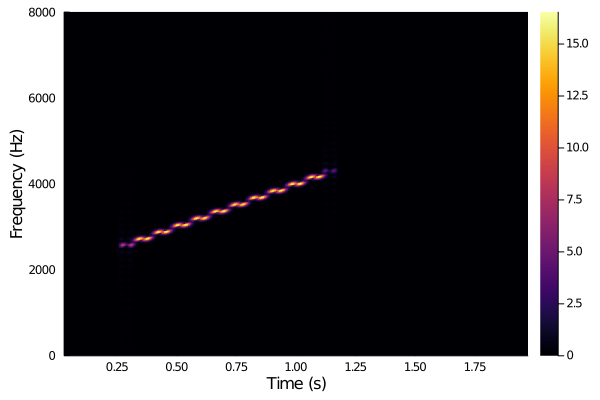

In [6]:
function show_filtered(S::STFT, kernel=Kernel.gaussian(3))
    Y = stft_filter(S, kernel)
    plot_heatmap(abs.(Y); time=S.time, freq=S.freq)
end
show_filtered(X, Kernel.gaussian(1))

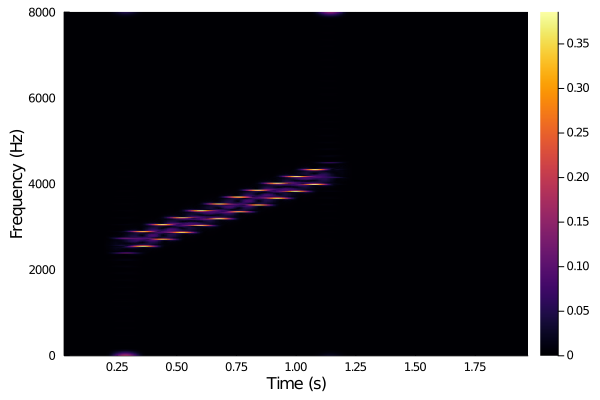

In [7]:
show_filtered(X, Kernel.gaussian(5))

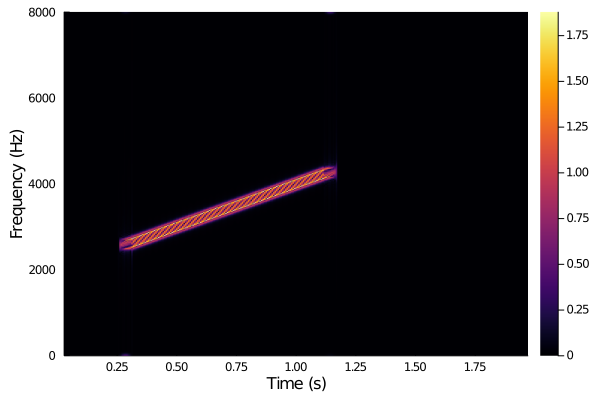

In [8]:
show_filtered(X, Kernel.gaussian((3, 0)))

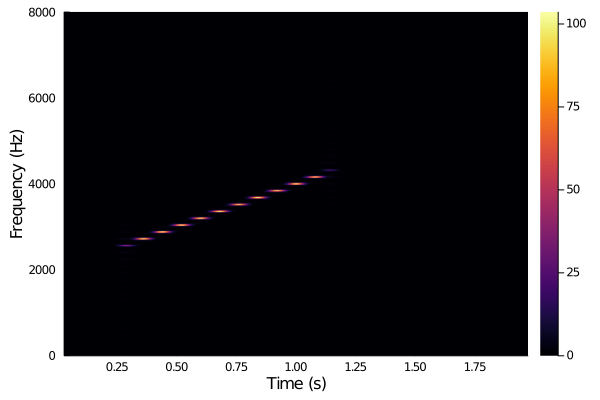

In [9]:
show_filtered(X, Kernel.gaussian((0, 3)))

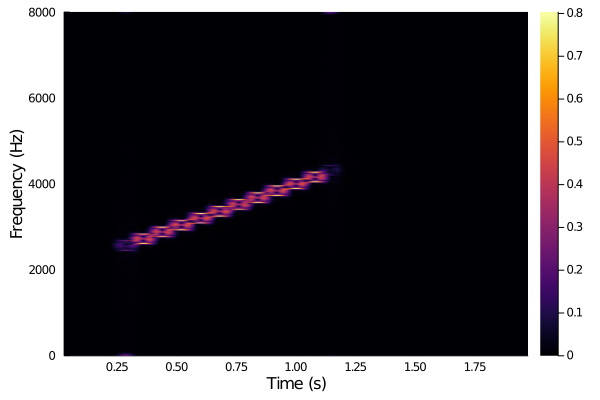

In [10]:
Y1 = stft_filter(X, Kernel.gaussian((0, 3)))
Y2 = stft_filter(Y1, Kernel.gaussian((3, 0)))
plot_heatmap(abs.(Y2); time=X.time, freq=X.freq)

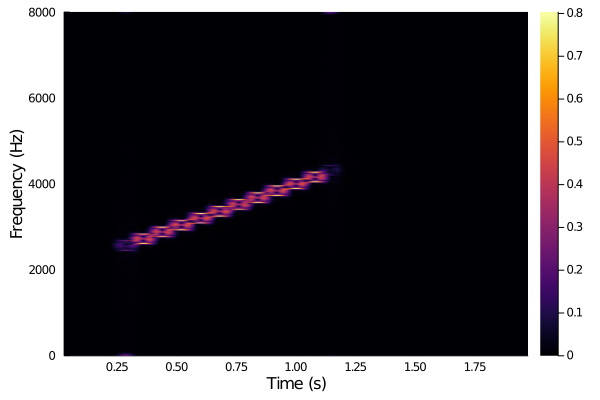

In [11]:
show_filtered(X, Kernel.gaussian(3))

Relative L1 distance: 0.9999076229069923


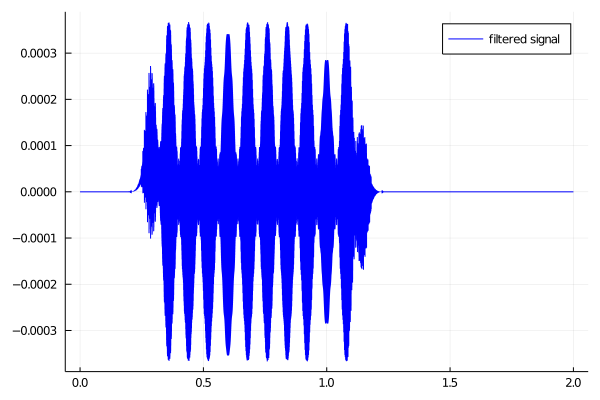

In [12]:
YY = STFT(Y, X.freq, X.time, X.width, X.sig_length, X.window)
y = istft(YY)

rel_dist(x, y) = sum(abs.(x - y)) / sum(abs.(x))
println("Relative L1 distance: ", rel_dist(x, y))

using Plots
t = (0:length(x)-1) / fs
plot(t, y, color="blue", label="filtered signal")
#plot!(t, x - y, color="red", label="signal difference")

In [13]:
play_audio(y, fs)

PyObject <IPython.lib.display.Audio object>

In [14]:
function signal_filter(s, fs, kernel=Kernel.gaussian(3))
    X = stft(s, 1000, 900; fs=fs, window=WCA1.hanning)
    Y = stft_filter(X, kernel)
    YY = STFT(Y, X.freq, X.time, X.width, X.sig_length, X.window)
    y = istft(YY)
    println("Relative L1 distance: ", rel_dist(s, y))
    return y
end

y = signal_filter(x, fs, Kernel.gaussian((3, 0)))
play_audio(y, fs)

Relative L1 distance: 0.9992481706505192


PyObject <IPython.lib.display.Audio object>

In [29]:
y = signal_filter(x, fs, Kernel.gaussian((4, 0)))
play_audio(y, fs)

Relative L1 distance: 1.004242094541506


PyObject <IPython.lib.display.Audio object>

In [15]:
y = signal_filter(x, fs, Kernel.gaussian((0, 3)))
play_audio(y, fs)

Relative L1 distance: 0.8962820736471757


PyObject <IPython.lib.display.Audio object>

## Recorded speech signal

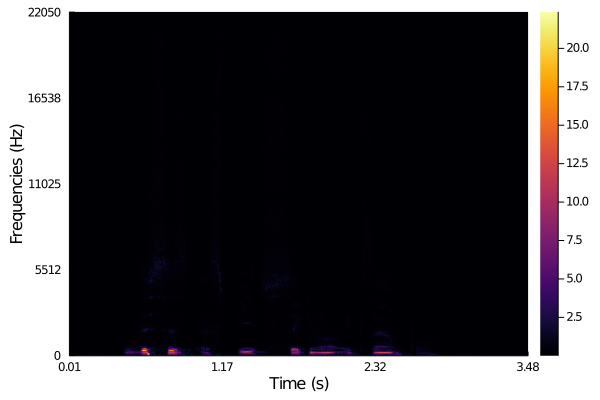

In [16]:
import WAV
x, fs = WAV.wavread("../samples/speech_signal_example.wav")
x = reshape(x, length(x))

X = stft(x, 1000, 900; fs=fs, window=WCA1.hanning)
show_stft(X)

In [17]:
play_audio(x, fs)

PyObject <IPython.lib.display.Audio object>

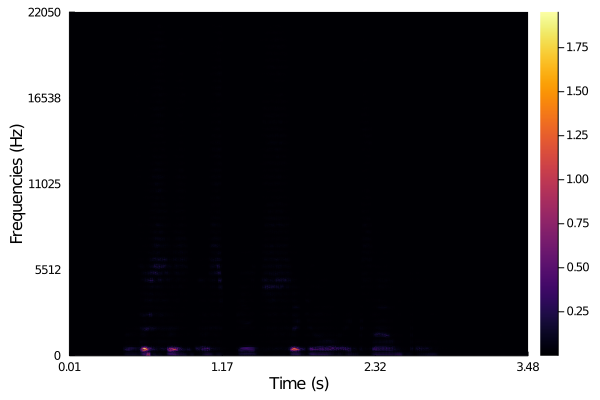

In [18]:
Y = stft_filter(X, Kernel.gaussian(1))
YY = STFT(Y, X.freq, X.time, X.width, X.sig_length, X.window)
show_stft(YY)

In [19]:
y = istft(YY)
println("Relative L1 distance: ", rel_dist(x, y))

t = (0:length(x)-1) / fs
plot(t, y, color="blue", label="filtered signal", ylim=(-0.05, +0.05))
#plot!(t, x - y, color="red", label="signal difference")

Relative L1 distance: 0.9780316675593972


In [20]:
play_audio(y, fs)

PyObject <IPython.lib.display.Audio object>

In [21]:
y = signal_filter(x, fs, Kernel.gaussian((1, 0)))
play_audio(y, fs)

Relative L1 distance: 0.9061345170960258


PyObject <IPython.lib.display.Audio object>

In [22]:
y = signal_filter(x, fs, Kernel.gaussian((0, 1)))
play_audio(y, fs)

Relative L1 distance: 0.8179104744514206


PyObject <IPython.lib.display.Audio object>

In [23]:
y = signal_filter(x, fs, Kernel.gaussian((3, 0)))
play_audio(y, fs)

Relative L1 distance: 1.0026768054154243


PyObject <IPython.lib.display.Audio object>

In [24]:
y = signal_filter(x, fs, Kernel.gaussian((0, 3)))
play_audio(y, fs)

Relative L1 distance: 0.9713678920745225


PyObject <IPython.lib.display.Audio object>